## Minerando presenças dos deputados

Foi-se utilizado uma base previamente limpa, que pode ser encontrada neste link: [Dados da câmara federal _by_ Nazareno](https://github.com/nazareno/dados-da-camara-federal)

> Obs.: Os dados estão atualizados até o mês de **agosto** de 2017, e a possiblidade de haver uma mineração direto da fonte não foi descartada

In [1]:
import requests as re
import pandas as pd
import numpy as np
import xmltodict
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline

In [2]:
votacoes = pd.read_csv('https://raw.githubusercontent.com/nazareno/dados-da-camara-federal/master/dados/votacoes.csv')
votacoes.columns

Index([u'tipo', u'num_pro', u'ano', u'id_votacao', u'data', u'hora', u'sessao',
       u'nome', u'id_dep', u'partido', u'uf', u'voto', u'orientacao_partido',
       u'orientacao_gov'],
      dtype='object')

In [3]:
votacoes.shape

(243916, 14)

In [4]:
votacoes.head()

,tipo,num_pro,ano,id_votacao,data,hora,sessao,nome,id_dep,partido,uf,voto,orientacao_partido,orientacao_gov
0,PEC,1,2015,1,22/3/2016,76200,5820,Ariosto Holanda,74103.0,pdt,CE,sim,sim,sim
1,PEC,1,2015,1,22/3/2016,76200,5820,Flavio Nogueira,191923.0,pdt,PI,sim,sim,sim
2,PEC,1,2015,1,22/3/2016,76200,5820,Zé Augusto Nalin,191945.0,pmdb,RJ,sim,NaN,sim
3,PEC,1,2015,1,22/3/2016,76200,5820,Paulo Henrique Lustosa,141517.0,pp,CE,sim,sim,sim
4,PEC,1,2015,1,22/3/2016,76200,5820,Wilson Beserra,193066.0,pmdb,RJ,sim,NaN,sim


In [5]:
meses = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
votacoes['mes'] = [meses[int(x[1])-1] for x in votacoes['data'].str.split('/')]

In [6]:
votacoes_2017 = votacoes[votacoes['ano'] == 2017]
votacoes_2017.head()

,tipo,num_pro,ano,id_votacao,data,hora,sessao,nome,id_dep,partido,uf,voto,orientacao_partido,orientacao_gov,mes
67363,PEC,304,2017,1,10/5/2017,76860,16201,Luiza Erundina,74784.0,psol,SP,não,não,sim,mai
67364,PEC,304,2017,1,10/5/2017,76860,16201,Roberto Alves,152610.0,prb,SP,sim,sim,sim,mai
67365,PEC,304,2017,1,10/5/2017,76860,16201,Lázaro Botelho,141480.0,pp,TO,sim,sim,sim,mai
67366,PEC,304,2017,1,10/5/2017,76860,16201,Sérgio Brito,73808.0,psd,BA,sim,sim,sim,mai
67367,PEC,304,2017,1,10/5/2017,76860,16201,Erivelton Santana,99654.0,pen,BA,não,NaN,sim,mai


- ### Ordenando por presença em sessões no plenário

   #### Deputados com o menor número de presenças

In [7]:
print(votacoes_2017['voto'].unique())

['n\xc3\xa3o' 'sim' '-' 'absten\xc3\xa7\xc3\xa3o' 'art. 17'
 'obstru\xc3\xa7\xc3\xa3o']


In [8]:
presencas = votacoes_2017[(votacoes_2017['voto'] <> '-') & (votacoes_2017['voto'] <> 'obtrução')].groupby([votacoes_2017['nome'], votacoes_2017['partido']])['voto'].count()
presencas.sort_values().head(30)

nome                  partido   
Pr. Luciano Braga     pmb            1
Dagoberto             pdt            1
Lourival Gomes        ptn            1
Rogério Silva         pmdb           1
Edinho Bez            pmdb           3
Alexandre Baldy       pode           3
Marcos Medrado        solidaried     5
                      pode           6
Mário Heringer        pdt            6
Carlos Zarattini      pt             7
Valtenir Pereira      psb            7
Odorico Monteiro      psb            8
Antônio Jácome        pode           8
Renata Abreu          pode           9
Jozi  Araújo          pode           9
Aluisio Mendes        pode           9
Vicente Candido       pt             9
Vinicius Gurgel       pr             9
Silas Freire          pode           9
Ezequiel Teixeira     pode           9
Ademir Camilo         pode          10
Ricardo Teobaldo      pode          10
Franklin              pp            11
Dr. Sinval Malheiros  pode          12
Tia Eron              prb      

#### Deputados com maior número de presenças

In [9]:
presencas.sort_values(ascending=False).head(30)

nome                      partido   
Tenente Lúcio             psb           48
Flavinho                  psb           48
Tiririca                  pr            48
Ivan Valente              psol          48
Carlos Manato             solidaried    48
Luiz Couto                pt            47
João Daniel               pt            47
Miro Teixeira             rede          47
Glauber Braga             psol          47
Victor Mendes             psd           47
Rogério Peninha Mendonça  pmdb          47
Ronaldo Benedet           pmdb          47
Afonso Motta              pdt           47
Delegado Edson Moreira    pr            47
Walney Rocha              pen           47
Valmir Assunção           pt            46
Izaque Silva              psdb          46
Jarbas Vasconcelos        pmdb          46
Chico Lopes               pcdob         46
Marcio Alvino             pr            46
Jose Stédile              psb           46
Átila Lira                psb           46
Expedito Netto   

#### Deputados ausentes que não justificaram

 * #### Mais ausentes

In [10]:
ausencias = votacoes_2017[(votacoes_2017['voto'] == '-')].groupby([votacoes_2017['nome'], votacoes_2017['partido']])['voto'].count()

In [11]:
ausencias.sort_values(ascending=False).head(30)

nome                 partido   
José Otávio Germano  pp            45
Giovani Cherini      pr            45
Carlos Zarattini     pt            38
Vinicius Gurgel      pr            36
Vicente Candido      pt            36
Aníbal Gomes         pmdb          34
Guilherme Mussi      pp            33
Luizianne Lins       pt            33
Giacobo              pr            32
Jéssica Sales        pmdb          32
Marco Maia           pt            31
Roberto Góes         pdt           31
João Carlos Bacelar  pr            31
Hermes Parcianello   pmdb          31
Ariosto Holanda      pdt           31
Sérgio Reis          prb           30
César Halum          prb           30
Bruna Furlan         psdb          30
Diego Garcia         phs           29
Wladimir Costa       solidaried    29
Eli Corrêa Filho     dem           29
Evandro Gussi        pv            28
Marcos Soares        dem           28
Zeca Dirceu          pt            28
Silvio Costa         ptdob         28
Jovair Arantes    

 * #### Menos ausentes

In [12]:
ausencias.sort_values().head(40)

nome                      partido   
Mário Heringer            pdt           1
Laudivio Carvalho         solidaried    1
Miro Teixeira             rede          1
Jarbas Vasconcelos        pmdb          1
Rogério Peninha Mendonça  pmdb          1
Luciano Bivar             psl           1
Luiz Carlos Ramos         pode          1
Glauber Braga             psol          1
Pedro Chaves              pmdb          1
Francisco Chapadinha      ptn           1
Josias Gomes              pt            1
Francisco Chapadinha      pode          1
Chico D Angelo            pt            1
Valtenir Pereira          psb           1
Victor Mendes             psd           1
Walney Rocha              pen           1
Fernando Torres           psd           1
Luiz Couto                pt            1
Marcos Medrado            pode          1
                          solidaried    1
Afonso Motta              pdt           1
João Daniel               pt            1
Luiz Carlos Ramos         ptn          

- ### Visualização de dados

Algo que me supreendeu aqui: Cerca de pouco mais de 200 deputados foram à mais de 30 sessões. _No mínimo interessante!_

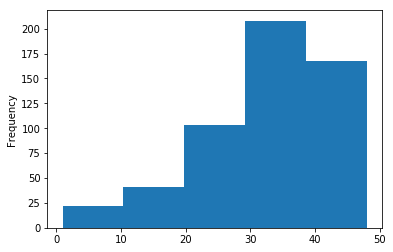

In [26]:
presencas.plot.hist(bins=5)

E em sua grande maioria, possuem menos de 10 faltas não justificadas.

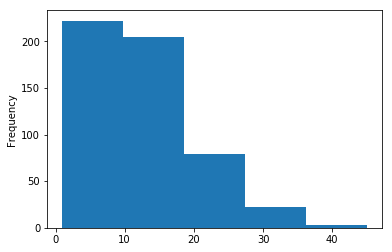

In [27]:
ausencias.plot.hist(bins=5)